In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
nba = pd.read_csv('nba_players.csv')
nba.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [3]:
nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [5]:
nba.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

In [6]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [7]:
report(nba)

,Column,d_type,unique_sample,n_uniques
0,Unnamed: 0,int64,"[0, 1, 2, 3, 4]",11145
1,Unnamed: 0.1,int64,"[0, 1, 2, 3, 4]",11145
2,player_name,object,"[Dennis Rodman, Dwayne Schintzius, Earl Cureto...",2235
3,team_abbreviation,object,"[CHI, LAC, TOR, DAL, MIA]",36
4,age,float64,"[36.0, 28.0, 39.0, 24.0, 34.0]",27
5,player_height,float64,"[198.12, 215.9, 205.74, 203.2, 200.66]",30
6,player_weight,float64,"[99.79024, 117.93392, 95.25432, 100.697424, 10...",157
7,college,object,"[Southeastern Oklahoma State, Florida, Detroit...",316
8,country,object,"[USA, Congo, Nigeria, Lithuania, Canada]",76
9,draft_year,object,"[1986, 1990, 1979, 1995, 1985]",45


### 1. (POIN: 15) Lakukan data preprocessing, seperti menghapus kolom yang sekiranya tidak dibutuhkan, strategi apa yang akan digunakan untuk mengisi missing value, metode apa yang akan digunakan untuk melakukan encoding, feature apa yang bisa ditambahkan, dan lain-lain. Serta berikan penjelasan di setiap langkah yang Anda jalankan.

In [8]:
# Delete column unnamed: 0 and Unnamed: 0.1
nba.drop('Unnamed: 0', axis=1, inplace=True)
nba.drop('Unnamed: 0.1', axis=1, inplace=True)

In [9]:
# column in nba player dataset
nba.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [10]:
nba['player_name'].value_counts()

Vince Carter      22
Dirk Nowitzki     21
Kobe Bryant       20
Kevin Garnett     20
Tyson Chandler    19
                  ..
A.J. Bramlett      1
Matt Steigenga     1
Evric Gray         1
Lionel Simmons     1
Dragan Tarlac      1
Name: player_name, Length: 2235, dtype: int64

In [11]:
nba[nba['player_name']=='Kobe Bryant'].head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
342,Kobe Bryant,LAL,18.0,200.66,90.71840,None,USA,1996,1,13,...,1.9,1.3,2.2,0.048,0.084,0.244,0.544,0.144,1996-97,0
536,Kobe Bryant,LAL,19.0,200.66,95.25432,None,USA,1996,1,13,...,3.1,2.5,6.9,0.044,0.088,0.268,0.548,0.165,1997-98,0
1098,Kobe Bryant,LAL,20.0,200.66,97.52228,None,USA,1996,1,13,...,5.3,3.8,2.8,0.033,0.128,0.254,0.549,0.176,1998-99,0
1649,Kobe Bryant,LAL,21.0,200.66,95.25432,None,USA,1996,1,13,...,6.3,4.9,10.4,0.046,0.128,0.266,0.546,0.215,1999-00,1
2079,Kobe Bryant,LAL,22.0,200.66,95.25432,None,USA,1996,1,13,...,5.9,5.0,6.3,0.042,0.117,0.315,0.552,0.220,2000-01,1


Player name yang memiliki jumlah lebih dari 1 menandakan bahwa pemain tersebut telah bermain lebih dari 1 season di NBA. Oleh sebab itu, data ini bukan merupakan data yg duplikasi.

In [12]:
pd.crosstab(nba['team_abbreviation'], nba['potential_player'])

potential_player,0,1
team_abbreviation,,
ATL,370,13
BKN,138,2
BOS,346,21
CHA,245,9
CHH,84,5
CHI,351,18
CLE,376,14
DAL,380,4
DEN,362,10


In [13]:
nba['country'].value_counts()

USA                    9410
France                  153
Canada                  140
Spain                    79
Brazil                   78
                       ... 
Angola                    1
Ghana                     1
Sudan (UK)                1
Guinea                    1
Trinidad and Tobago       1
Name: country, Length: 76, dtype: int64

Kebanyakan pemain NBA berasal dari negara USA

In [14]:
nba['college'].value_counts()

None                1684
Kentucky             360
Duke                 331
North Carolina       318
UCLA                 280
                    ... 
George Mason           1
Portland               1
North Texas            1
Siena                  1
Eastern Illinois       1
Name: college, Length: 316, dtype: int64

In [15]:
nba.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [16]:
nba.corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
age,1.000000,-0.013981,0.046904,0.046221,-0.000810,0.028319,0.083695,0.088161,-0.064672,0.012451,-0.133839,0.025627,0.063037,0.009211
player_height,-0.013981,1.000000,0.829901,-0.005844,-0.059748,0.422547,-0.463908,-0.009260,0.589033,0.614650,-0.110438,0.069810,-0.632000,-0.085887
player_weight,0.046904,0.829901,1.000000,0.009308,-0.032130,0.436762,-0.395356,-0.000503,0.603258,0.606327,-0.074495,0.060416,-0.547488,-0.062429
gp,0.046221,-0.005844,0.009308,1.000000,0.543846,0.471562,0.388840,0.251260,-0.021649,0.060702,0.138119,0.389950,0.134544,0.141288
pts,-0.000810,-0.059748,-0.032130,0.543846,1.000000,0.623909,0.652098,0.217883,-0.121267,0.048110,0.633110,0.382417,0.322214,0.421311
reb,0.028319,0.422547,0.436762,0.471562,0.623909,1.000000,0.224217,0.190416,0.411597,0.606899,0.221804,0.314563,-0.087725,0.201826
ast,0.083695,-0.463908,-0.395356,0.388840,0.652098,0.224217,1.000000,0.165236,-0.349217,-0.215141,0.378803,0.180234,0.802008,0.503401
net_rating,0.088161,-0.009260,-0.000503,0.251260,0.217883,0.190416,0.165236,1.000000,0.056177,0.036148,-0.004305,0.309536,0.060158,0.089950
oreb_pct,-0.064672,0.589033,0.603258,-0.021649,-0.121267,0.411597,-0.349217,0.056177,1.000000,0.552462,-0.102698,0.066285,-0.443269,-0.083355
dreb_pct,0.012451,0.614650,0.606327,0.060702,0.048110,0.606899,-0.215141,0.036148,0.552462,1.000000,-0.028883,0.098745,-0.346278,0.015748


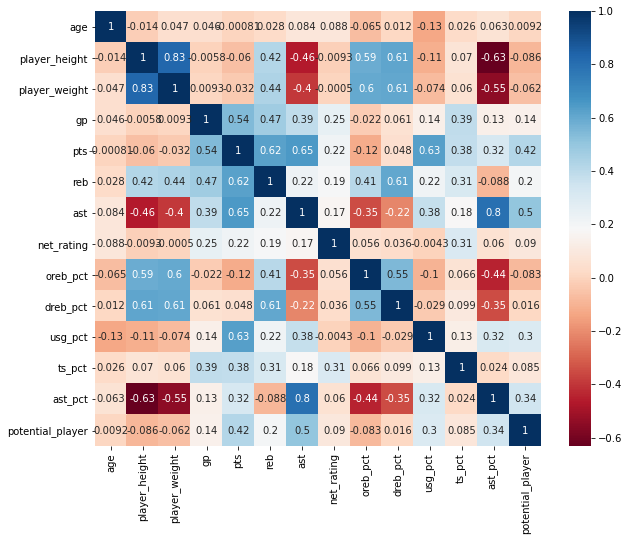

In [17]:
plt.figure(figsize = (10,8))       
sns.heatmap(nba.corr(method='pearson')             
            , annot = True        
            , cmap = 'RdBu')
plt.show()

### Kolom player name, team_abb, college, country, draft year, draft round, draft number, season juga bisa didelete karena fitur tersebut tidak berpengaruh terhadap potensial dari pemain

In [18]:
nbafilter = nba.drop(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], axis=1)

In [19]:
nbafilter.head(1)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.79024,55,5.7,16.1,3.1,16.1,0.186,0.323,0.1,0.479,0.113,0


## 2. (POIN: 20) Buatlah minimal 5 (lima) macam data visualisasi yang dapat menampilkan insight dari para pemain NBA baik yang di-cap sebagai potential player maupun yang bukan. Ceritakan juga insight yang Anda temukan. Minimal visualisasi yang perlu ditampilkan.

- Bagaimana distribusi score antara pemain yang potential dengan yang tidak potential?
- Bagaimana distribusi rebound antara pemain yang potential dengan yang tidak potential?
- Bagaimana distribusi assist antara pemain yang potential dengan yang tidak potential?
- Apakah tinggi dan berat pemain dapat mempengaruhi pemain dicap potential atau tidak?
- Kampus mana yang paling sering menelurkan pemain-pemain potential di NBA?

In [20]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [21]:
nbapoten = nba[['player_weight', 'player_height', 'college', 'country', 'pts', 'reb', 'ast', 'potential_player']]

In [22]:
nbapoten.head()

,player_weight,player_height,college,country,pts,reb,ast,potential_player
0,99.790240,198.12,Southeastern Oklahoma State,USA,5.7,16.1,3.1,0
1,117.933920,215.90,Florida,USA,2.3,1.5,0.3,0
2,95.254320,205.74,Detroit Mercy,USA,0.8,1.0,0.4,0
3,100.697424,203.20,UCLA,USA,3.7,2.3,0.6,0
4,108.862080,205.74,Villanova,USA,2.4,2.4,0.2,0


>## Points

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


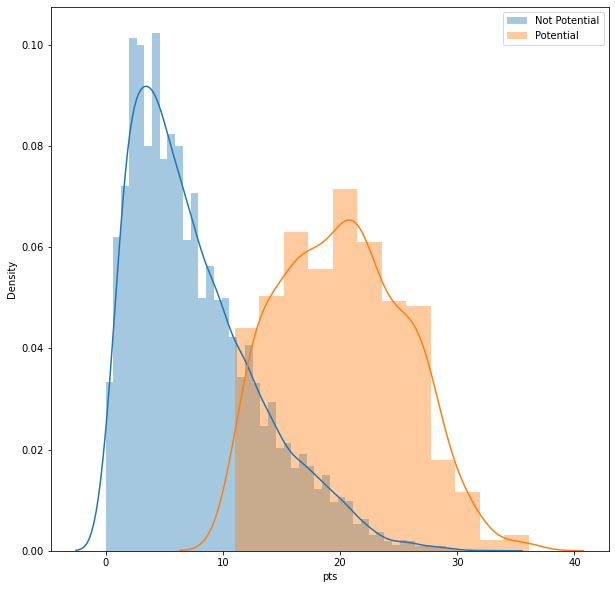

In [23]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] == 0]['pts'], label='Not Potential')
sns.distplot(nba[nba['potential_player'] == 1]['pts'], label='Potential')
plt.legend()
plt.show()

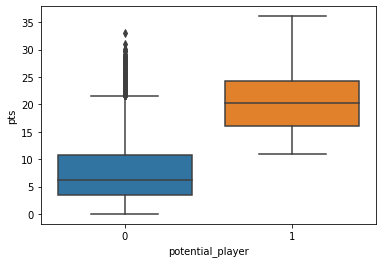

In [24]:
sns.boxplot(x='potential_player', y='pts', data=nbapoten)
plt.show()

Dari boxplot dan distribution plot di atas, dapat dilihat bahwa points dari potential player lebih banyak dibandingkan dengan points dari non potential player.

In [25]:
nba[['player_name', 'age', 'pts', 'potential_player']].sort_values('pts', ascending=False).head(10)

,player_name,age,pts,potential_player
10219,James Harden,29.0,36.1,1
4083,Kobe Bryant,27.0,35.4,1
10746,James Harden,30.0,34.5,1
4271,Allen Iverson,31.0,33.0,0
2953,Tracy McGrady,24.0,32.1,1
7972,Kevin Durant,25.0,32.0,1
4825,Kobe Bryant,28.0,31.6,1
9304,Russell Westbrook,28.0,31.6,1
4075,LeBron James,21.0,31.4,1
2490,Allen Iverson,27.0,31.4,1


Berikut adalah daftar 10 pemain dengan points tertinggi.
James Harden saat berusia 29 tahun menjadi pemain dengan rata-rata points tertinggi, yaitu sebanyak 36,1, disusul oleh Kobe saat berusia 27 tahun dengan rata-rata points 35,4, lalu peringkat ketiga ditempati oleh Harden saat berusia 30 tahun dengan rata-rata points 34.5.

Dari 10 pemain dengan rata-rata points tertinggi, ada 1 pemain yang tidak termasuk potential player. Pemain tersebut adalah Allen Iverson saat berusia 33 tahun.

>## Rebounds

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


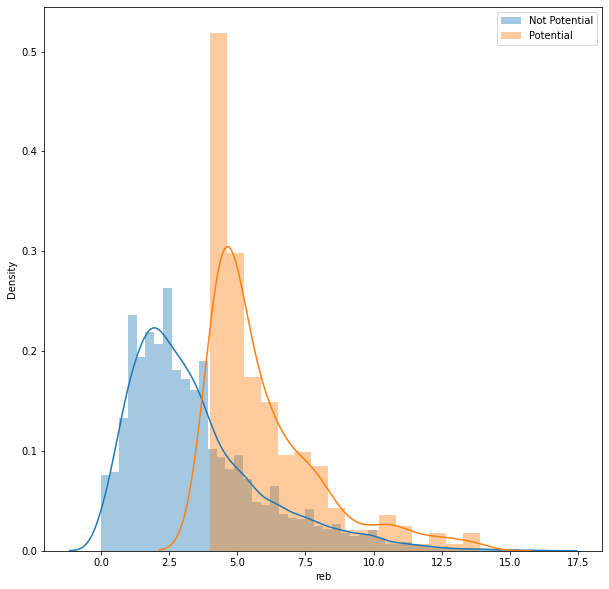

In [26]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] == 0]['reb'], label='Not Potential')
sns.distplot(nba[nba['potential_player'] == 1]['reb'], label='Potential')
plt.legend()
plt.show()

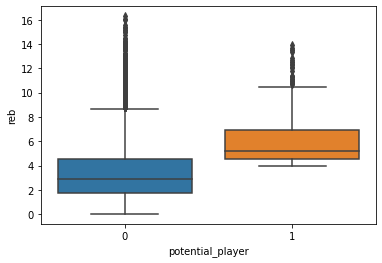

In [27]:
sns.boxplot(x='potential_player', y='reb', data=nbapoten)
plt.show()

Dari boxplot dan distribution plot di atas, dapat dilihat bahwa rebounds dari potential player lebih banyak dibandingkan dengan rebounds dari not potential player

In [28]:
nba[['player_name', 'age', 'reb', 'potential_player']].sort_values('reb', ascending=False).head(10)

,player_name,age,reb,potential_player
1943,Danny Fortson,25.0,16.3,0
0,Dennis Rodman,36.0,16.1,0
9666,Andre Drummond,24.0,16.0,0
10272,Andre Drummond,25.0,15.6,0
2735,Ben Wallace,28.0,15.4,0
10808,Andre Drummond,26.0,15.3,0
9687,DeAndre Jordan,29.0,15.2,0
6255,Kevin Love,22.0,15.2,0
8135,DeAndre Jordan,26.0,15.0,0
713,Dennis Rodman,37.0,15.0,0


Berikut adalah daftar 10 pemain dengan rata-rata rebounds terbanyak. Dari 10 pemain tersebut, tidak ada satupun yang termasuk dalam potential players.

>## Assists

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


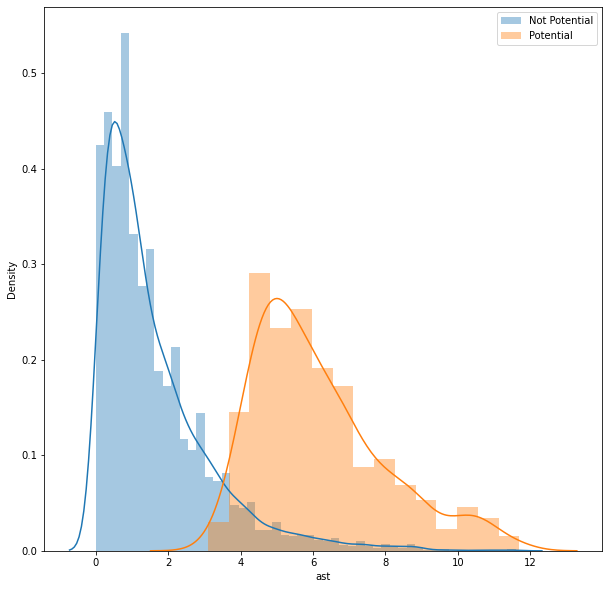

In [29]:
plt.figure(figsize=[10,10])
sns.distplot(nba[nba['potential_player'] == 0]['ast'], label='Not Potential')
sns.distplot(nba[nba['potential_player'] == 1]['ast'], label='Potential')
plt.legend()
plt.show()

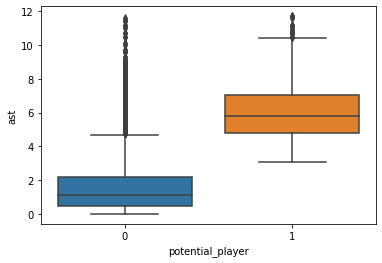

In [30]:
sns.boxplot(x='potential_player', y='ast', data=nbapoten)
plt.show()

Dari boxplot dan distribution plot di atas, dapat dilihat bahwa assists dari potential player lebih banyak dibandingkan dengan assists dari not potential player.

In [31]:
nba[['player_name', 'age', 'ast', 'potential_player']].sort_values('ast', ascending=False).head(10)

,player_name,age,ast,potential_player
6817,Rajon Rondo,26.0,11.7,1
8662,Rajon Rondo,30.0,11.7,1
5056,Chris Paul,23.0,11.6,1
4759,Steve Nash,33.0,11.6,0
3647,Steve Nash,31.0,11.5,0
430,Mark Jackson,32.0,11.4,0
6555,Steve Nash,37.0,11.4,0
9249,James Harden,27.0,11.2,1
6644,Rajon Rondo,25.0,11.2,0
5232,Steve Nash,34.0,11.1,0


Berikut merupakan daftar 10 pemain dengan rata-rata assists tertinggi. Rajon Rondo saat berusia 26 tahun dan saat berusia 30 tahun menjadi pemain dengan rata-rata assists tertinggi yang berjumlah 11.7. Lalu disusul oleh Chris Paul saat berusia 23 tahun dan Steve Nash saat berusia 33 tahun dengan rata-rata assists 11.6.

Dari 10 nama assists terbanyak tersebut, hanya 4 nama yang dicap menjadi potential player yaitu Rondo saat berusia 26 tahun, Rondo saat berusia 30 tahun, Chris Paul saat berusia 23 tahun, dan Harden saat berusia 27 tahun.

>## Player Weight and Player Height

In [32]:
nbapoten.corr()

,player_weight,player_height,pts,reb,ast,potential_player
player_weight,1.000000,0.829901,-0.032130,0.436762,-0.395356,-0.062429
player_height,0.829901,1.000000,-0.059748,0.422547,-0.463908,-0.085887
pts,-0.032130,-0.059748,1.000000,0.623909,0.652098,0.421311
reb,0.436762,0.422547,0.623909,1.000000,0.224217,0.201826
ast,-0.395356,-0.463908,0.652098,0.224217,1.000000,0.503401
potential_player,-0.062429,-0.085887,0.421311,0.201826,0.503401,1.000000


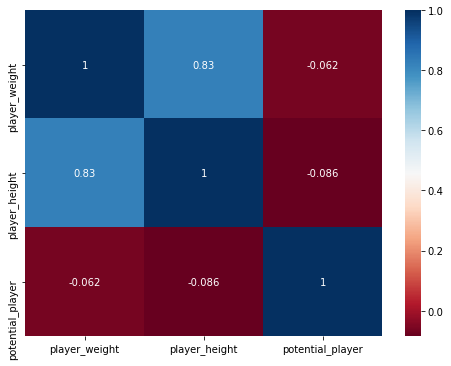

In [33]:
# Melihat korelasi antara tinggi dan berat pemain terhadap pemain potensial

plt.figure(figsize = (8,6))       
sns.heatmap(nbapoten[['player_weight', 'player_height', 'potential_player']].corr(method='pearson')             
            , annot = True        
            , cmap = 'RdBu')
plt.show()

Berdasarkan heatmap correlation di atas, dapat dilihat bahwa tinggi dan berat badan pemain tidak mempengaruhi pemain untuk menjadi pemain yang potensial.

In [34]:
# 5 Kampus teratas yang melahirkan banyak pemain NBA

nba[nbapoten['potential_player']==1]['college'].value_counts().head(6)

None           93
Kentucky       36
UCLA           28
Marquette      18
Arizona        17
Wake Forest    16
Name: college, dtype: int64

Kampus yang paling sering menelurkan pemain-pemain NBA adalah kampus Kentucky dengan jumlah sebanyak 36, peringkat kedua adalah UCLA dengan jumlah 28, dan yang ketiga adalah Marquette dengan jumlah sebanyak 18.

In [35]:
pd.crosstab(nba['age'], nba['potential_player'], normalize='index')

potential_player,0,1
age,,
18.0,1.000000,0.000000
19.0,0.985075,0.014925
20.0,0.979675,0.020325
21.0,0.969412,0.030588
22.0,0.958702,0.041298
23.0,0.972089,0.027911
24.0,0.967629,0.032371
25.0,0.960000,0.040000
26.0,0.952840,0.047160


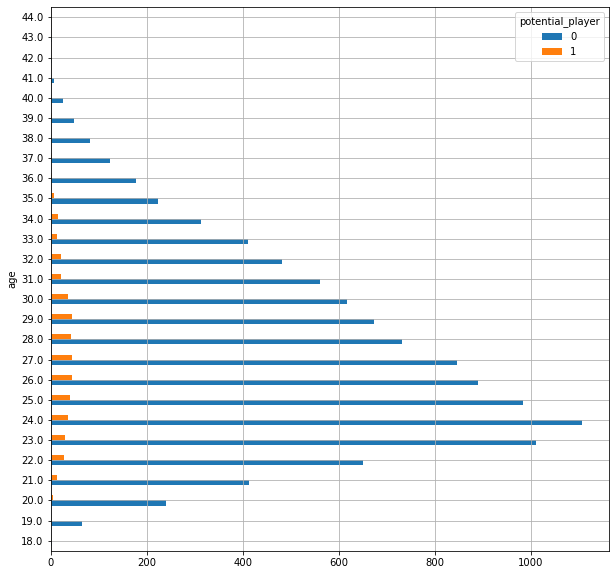

In [36]:
pd.crosstab(nba['age'], nba['potential_player']).plot(kind='barh', figsize=(10,10))
plt.grid()
plt.show()

Pemain NBA yang potensial rata-rata berusia 21 sampai 35 tahun dengan persentase > 0.025% dibandingkan dengan semua pemain di usia tersebut.

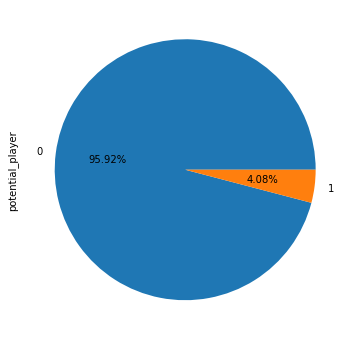

In [37]:
# Potential Player Percentage

nba['potential_player'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6,6))
plt.show()

Persentase potential player hanya 4.08% dari keseluruhan player

## 3. (POIN: 10) Buatlah training_validation dataset dan testing dataset. Silahkan Anda atur test_size / train_size maupun random_state sesuai dengan keinginan Anda.

In [38]:
nbafilter.columns

Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct',
       'potential_player'],
      dtype='object')

In [39]:
X =  nbafilter.drop('potential_player', axis=1)
y = nbafilter['potential_player']

In [40]:
nbafilter.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0


In [41]:
X.head(3)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.79024,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.93392,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.25432,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2020)

In [43]:
nbafilter[['ast', 'ast_pct']].corr()

,ast,ast_pct
ast,1.000000,0.802008
ast_pct,0.802008,1.000000


Kolom ast dan kolom ast pct memiliki korelasi yang sangat tinggi. Oleh sebab itu, saya akan drop ast pct.

In [44]:
X.drop('ast_pct', axis=1, inplace=True)

## 4.(POIN: 20) Buatlah 2 (dua) benchmark machine learning model untuk klasifikasi (pilihan model bebas). Lakukan cross_val_score untuk mengetahui model benchmark mana yang berpotensi. Pada poin ini, tentukan juga scoring yang menjadi fokus Anda (pilih salah satu):

- Recall, atau
- Precision

In [45]:
# model benchmark
gbc = GradientBoostingClassifier(random_state=2020)
dtc = DecisionTreeClassifier()

### 1. DTC wo Scaling

In [46]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dtc.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       0.97      0.97      0.97        91

    accuracy                           1.00      2229
   macro avg       0.98      0.98      0.98      2229
weighted avg       1.00      1.00      1.00      2229



In [49]:
confusion_matrix(y_test, y_pred)

array([[2135,    3],
       [   3,   88]], dtype=int64)

In [50]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [51]:
make_conf_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,2135,3,2138
a_1,3,88,91
total_prediction,2138,91,2229


## 2. Gradient Boost wo Scaling

In [52]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2020)

In [53]:
gbcpred = gbc.predict(X_test)
gbcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_test, gbcpred)

0.9995513683266039

In [55]:
print(classification_report(y_test, gbcpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      0.99      0.99        91

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [56]:
confusion_matrix(y_test, gbcpred)

array([[2138,    0],
       [   1,   90]], dtype=int64)

In [57]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [58]:
make_conf_matrix(confusion_matrix(y_test, gbcpred))

,p_0,p_1,total_actual
a_0,2138,0,2138
a_1,1,90,91
total_prediction,2139,90,2229


>### Evaluation

Untuk memudahkan proses recruitment, Anda akan menggunakan dataset nba_players.csv sebagai dasar untuk membangun model machine learning untuk menentukan pemain-pemain baru yang pantas Anda rekrut. Kolom potential_player pada dataset NBA adalah acuan Anda. 0 berarti pemain tersebut tidak memiliki potensi dan cenderung untuk tidak direkrut. Dan sebaliknya.

In [59]:
# Scoring yang difokuskan adalah precision, karena keuangan tim sedang tidak bagus. 
# Oleh sebab itu, tim tidak boleh salah dalam merekrut pemain karena akan sangat merugikan apabila tim merekrut pemain yang tidak berpotensi
# artinya false positive harus kecil agar kemungkinan untuk pemain tidak berpotensi namun diprediksi berpotensi menjadi kecil

skfold = StratifiedKFold(n_splits=5)

dtc_cv_pc = cross_val_score(dtc, X_train, y_train, cv = skfold, scoring='precision')
gbc_cv_pc = cross_val_score(gbc, X_train, y_train, cv = skfold, scoring='precision')

In [60]:
print('CV DTC:', dtc_cv_pc)
print('CV GBC:', gbc_cv_pc)

CV DTC: [1.         0.95714286 1.         1.         0.97297297]
CV GBC: [1.         0.98611111 1.         1.         1.        ]


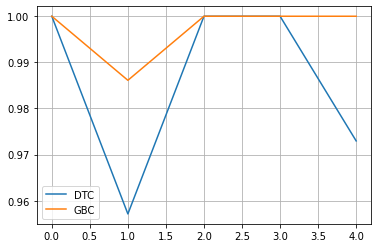

In [61]:
plt.plot(range(len(dtc_cv_pc)), dtc_cv_pc, label='DTC')
plt.plot(range(len(gbc_cv_pc)), gbc_cv_pc, label='GBC')
plt.grid()
plt.legend()
plt.show()

In [62]:
print('CV DTC:', dtc_cv_pc.mean())
print('CV GBC:', gbc_cv_pc.mean())

CV DTC: 0.986023166023166
CV GBC: 0.9972222222222221


In [63]:
model = pd.DataFrame({
    'Decision Tree' : [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)],
    'Gradient Boost' : [accuracy_score(y_test, gbcpred), precision_score(y_test, gbcpred), f1_score(y_test, gbcpred)]
}, index=['Accuracy Score', 'Precision Score', 'F1 Score'])

In [64]:
model

,Decision Tree,Gradient Boost
Accuracy Score,0.997308,0.999551
Precision Score,0.967033,1.000000
F1 Score,0.967033,0.994475


Dari perbandingan model di atas, diketahui bahwa model Gradient Boost lebih baik dibandingkan dengan model Decision Tre

>### Scaling

In [97]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [66]:
X_minmax_ft = minmax.fit_transform(X)
X_minmax_ft = pd.DataFrame(X_minmax_ft, columns=X.columns)
X_minmax_ft

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct
0,0.692308,0.535714,0.383260,0.642857,0.157895,0.987730,0.264957,0.4322,0.186,0.323,0.100,0.319333
1,0.384615,0.785714,0.559471,0.166667,0.063712,0.092025,0.025641,0.4246,0.078,0.151,0.175,0.286667
2,0.807692,0.642857,0.339207,0.095238,0.022161,0.061350,0.034188,0.3958,0.105,0.102,0.103,0.250667
3,0.230769,0.607143,0.392070,0.750000,0.102493,0.141104,0.051282,0.3826,0.060,0.149,0.167,0.266000
4,0.615385,0.642857,0.471366,0.309524,0.066482,0.147239,0.017094,0.3776,0.109,0.179,0.127,0.407333
...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.384615,0.678571,0.471366,0.738095,0.252078,0.331288,0.094017,0.4092,0.056,0.140,0.136,0.403333
11141,0.192308,0.500000,0.361233,0.166667,0.033241,0.018405,0.008547,0.3952,0.018,0.058,0.164,0.320000
11142,0.384615,0.750000,0.559471,0.571429,0.168975,0.312883,0.094017,0.4112,0.029,0.217,0.120,0.426667
11143,0.346154,0.678571,0.431718,0.226190,0.058172,0.184049,0.034188,0.3672,0.085,0.237,0.126,0.347333


In [67]:
X_trains, X_tests, y_train, y_test = train_test_split(X_minmax_ft, y, test_size=.2, stratify=y, random_state=2020)

In [68]:
gbc.fit(X_trains, y_train)

GradientBoostingClassifier(random_state=2020)

In [69]:
gbcpredscaled = gbc.predict(X_tests)
gbcpredscaled

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
accuracy_score(y_test, gbcpredscaled)

0.993719156572454

In [71]:
print(classification_report(y_test, gbcpredscaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       0.94      0.90      0.92        91

    accuracy                           0.99      2229
   macro avg       0.97      0.95      0.96      2229
weighted avg       0.99      0.99      0.99      2229



In [72]:
make_conf_matrix(confusion_matrix(y_test, gbcpredscaled))

,p_0,p_1,total_actual
a_0,2133,5,2138
a_1,9,82,91
total_prediction,2142,87,2229


Hasil nya menjadi sedikit lebih jelek dibandingkan dengan model wo scaled

>### SMOTE

In [73]:
smote = SMOTE(random_state=2020)
xs, ys = smote.fit_resample(X_train, y_train)

In [74]:
gbcsmote = GradientBoostingClassifier()

In [75]:
gbcsmote.fit(xs, ys)
gbcsmotepred = gbcsmote.predict(X_test)
gbcsmotepred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
accuracy_score(y_test, gbcsmotepred)

0.9995513683266039

In [77]:
print(classification_report(y_test, gbcsmotepred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      0.99      0.99        91

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [78]:
make_conf_matrix(confusion_matrix(y_test, gbcsmotepred))

,p_0,p_1,total_actual
a_0,2138,0,2138
a_1,1,90,91
total_prediction,2139,90,2229


tidak ada perubahan dengan menggunakan smote

>## Hyperparameter Gradient Boost

In [79]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [80]:
gbchyper = GradientBoostingClassifier(random_state=2020)

In [81]:
gbchyper.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2020)

In [82]:
param_random_gbc = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [3,10],
    'min_samples_split': [2,5],
    'n_estimators': [100,200]
}

In [83]:
random_search_gbc = RandomizedSearchCV(estimator=gbchyper,
                                      param_distributions=param_random_gbc,
                                      scoring='precision',
                                      n_jobs=-1)

In [84]:
random_search_gbc.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=2020),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [3, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='precision')

In [85]:
random_search_gbc.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 3,
 'learning_rate': 0.1}

In [86]:
gbcrandom = random_search_gbc.best_estimator_

In [87]:
gbcrandompred = gbcrandom.predict(X_test)
gbcrandomproba = gbcrandom.predict_proba(X_test)

In [88]:
print(classification_report(y_test, gbcrandompred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      0.99      0.99        91

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [89]:
make_conf_matrix(confusion_matrix(y_test, gbcrandompred))

,p_0,p_1,total_actual
a_0,2138,0,2138
a_1,1,90,91
total_prediction,2139,90,2229


### Prediction

In [90]:
newplayer = pd.read_csv('new_players.csv')
newplayer.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [91]:
X.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611


In [92]:
nbafilter.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0


In [107]:
newfilter = newplayer.drop(['Unnamed: 0', 'player_id', 'college', 'country', 'ast_pct'],axis=1)
newfilter.head(1)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct
0,37.0,205.74,104.32616,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489


In [108]:
minmax.fit(newfilter)
scaler_feature_prediction = minmax.transform(newfilter)
predictdata = pd.DataFrame(scaler_feature_prediction, columns=newfilter.columns)
predictdata

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct
0,0.857143,0.642857,0.570588,0.841463,0.095541,0.269231,0.072165,0.558354,0.233333,0.651099,0.228,0.465714
1,0.666667,0.000000,0.047059,0.731707,0.181529,0.141026,0.556701,0.538698,0.055556,0.203297,0.258,0.468571
2,0.380952,0.464286,0.452941,0.426829,0.598726,0.358974,0.536082,0.624693,0.050000,0.423077,0.556,0.494286
3,0.095238,0.500000,0.511765,0.500000,0.079618,0.083333,0.113402,0.564496,0.083333,0.315934,0.342,0.380952
4,0.190476,0.785714,0.805882,0.304878,0.105096,0.217949,0.030928,0.542383,0.191667,0.607143,0.224,0.524762
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.428571,0.571429,0.558824,0.975610,0.694268,0.756410,0.185567,0.633907,0.238889,0.653846,0.444,0.562857
496,0.428571,0.571429,0.605882,0.939024,0.407643,0.282051,0.164948,0.560197,0.150000,0.340659,0.466,0.466667
497,0.190476,0.678571,0.558824,0.548780,0.149682,0.166667,0.051546,0.591523,0.241667,0.445055,0.348,0.510476
498,0.238095,0.750000,0.629412,0.829268,0.194268,0.250000,0.020619,0.579853,0.275000,0.384615,0.292,0.569524


In [111]:
coba = gbc.predict(predictdata)

In [112]:
coba

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
newplayer['potential_player'] = coba

In [122]:
newplayer['potential_player'].value_counts()

0    458
1     42
Name: potential_player, dtype: int64

In [145]:
newplayer[newplayer['potential_player']==1]

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
7,7,8,27.0,200.66,99.790240,Southern California,USA,74,27.3,5.2,3.9,3.3,0.030,0.134,0.342,0.552,0.204,1
31,31,32,21.0,198.12,95.254320,Kentucky,USA,54,24.9,4.5,4.7,-9.3,0.013,0.112,0.301,0.561,0.233,1
48,48,49,32.0,203.20,97.522280,Butler Community College,USA,81,20.6,5.0,3.7,1.4,0.031,0.121,0.275,0.518,0.170,1
62,62,63,24.0,198.12,95.707912,Washington,USA,78,22.6,4.7,5.1,8.9,0.044,0.115,0.274,0.573,0.243,1
72,72,73,27.0,200.66,97.522280,Wisconsin,USA,82,22.6,6.3,5.3,0.0,0.038,0.121,0.252,0.522,0.213,1
149,149,150,25.0,205.74,108.862080,None,USA,77,16.5,8.5,3.3,1.8,0.061,0.233,0.249,0.540,0.168,1
151,151,152,26.0,198.12,93.893544,Arizona,USA,82,17.1,6.5,5.8,-4.3,0.030,0.168,0.218,0.535,0.238,1
153,153,154,28.0,187.96,90.718400,Utah,USA,82,14.8,4.5,6.1,2.5,0.051,0.097,0.206,0.541,0.283,1
165,165,166,26.0,195.58,83.460928,Saint Louis,USA,61,22.0,6.3,4.7,2.8,0.034,0.151,0.264,0.523,0.214,1


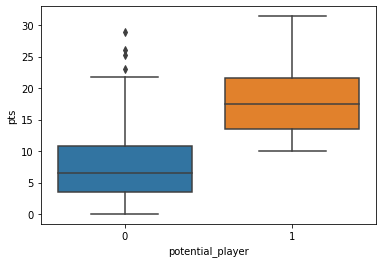

In [149]:
# Boxplot points new player

sns.boxplot(x='potential_player', y='pts', data=newplayer)
plt.show()

Points dari potential player lebih tinggi dibandingkan not potential player

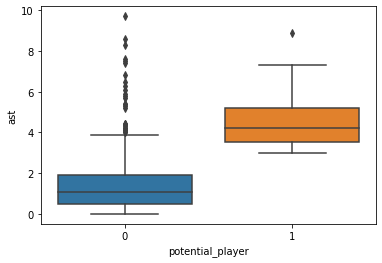

In [152]:
sns.boxplot(x='potential_player', y='ast', data=newplayer)
plt.show()

Assists dari potential player lebih tinggi dibandingkan not potential player

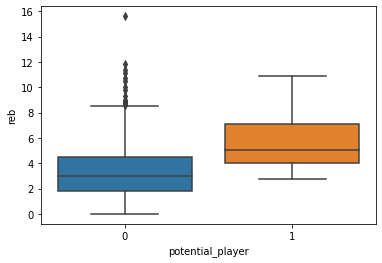

In [151]:
sns.boxplot(x='potential_player', y='reb', data=newplayer)
plt.show()

Rebounds dari potential player lebih tinggi dibandingkan not potential player

In [144]:
potential = newplayer[newplayer['potential_player']==1]

In [134]:
print('Jumlah player dari NCAA yang merupakan ptential player ada', len(potential),'orang')

Jumlah player dari NCAA yang merupakan ptential player ada 42 orang
